In [6]:
from numpy import array
from numpy import argmax
from numpy import array_equal
from random import randint
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

style.use("ggplot")

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [7]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

In [45]:
df = web.DataReader('TSLA','yahoo',start,end)

In [46]:
df.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999


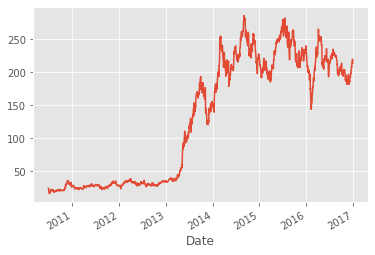

In [47]:
df['Adj Close'].plot()
plt.show()

In [48]:
df['100ma'] = df ['Adj Close'].rolling(window=100,min_periods=0).mean()
df['10ma'] = df ['Adj Close'].rolling(window=10,min_periods=0).mean()

# we will take the mean from 100 but the minimum is equal 0 

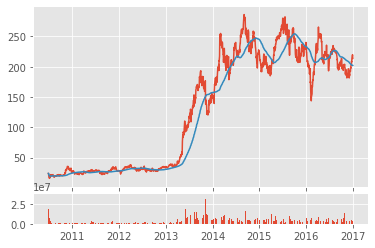

In [49]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=5,colspan=1)
ax1.plot(df.index,df['Adj Close'])
ax1.plot(df.index,df['100ma'])
ax2.bar(df.index,df['Volume'])
plt.show()

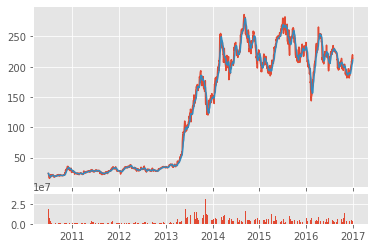

In [50]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=5,colspan=1)
ax1.plot(df.index,df['Adj Close'])
ax1.plot(df.index,df['10ma'])
ax2.bar(df.index,df['Volume'])
plt.show()

In [51]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma,10ma
Date,,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,23.889999,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,23.860000,23.860000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,23.226666,23.226666
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,22.220000,22.220000
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,20.998000,20.998000


In [52]:
df.shape

(1640, 8)

## in Day Predict Adj Close 
- input : open - low - high 
- output : Adj Close

In [53]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [56]:
X=df.iloc[:,[0,1,2,4]].values
y=df.iloc[:,[5]].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[0.01615124]
[[ 8.21431768e-01  7.23261445e-01 -5.45014270e-01 -3.14262395e-08]]


In [60]:
y_pred = regressor.predict(X_test)


In [61]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,206.429993,204.538773
1,245.570007,246.773605
2,210.240005,208.612243
3,188.770004,189.811880
4,29.110001,29.488230
...,...,...
323,218.360001,217.478902
324,104.629997,103.326391
325,219.610001,220.682986
326,223.429993,222.038743


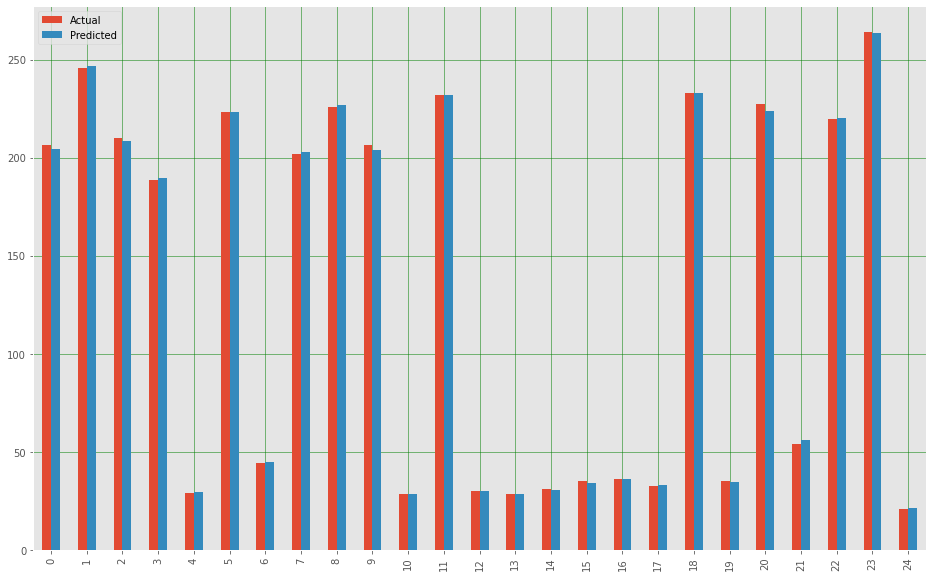

In [62]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0195992289108535
Mean Squared Error: 2.294371817776482
Root Mean Squared Error: 1.5147183955364383


# LSTM Predict Next Day Stock Prediction

In [69]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from keras.layers.core import Dense, Activation, Dropout
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

In [70]:
class TimeFrameRNN:
    
    def __init__(self,sequence=[],n_steps=4,past=False):
        self.past = past
        self.sequence =sequence
        self.n_steps = n_steps
        self.data = self.split_sequence(sequence,n_steps)
        

    def reversed_it(self,sequence):
        if self.past==True:
            array = list()
            for item in reversed(sequence):
                array.append(item)
            return array
        else:
            return sequence
            
    def split_sequence(self,sequence, n_steps):
            sequence = self.reversed_it(sequence)
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                    # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)
        
    def get_data(self):
        return self.split_sequence(self.sequence,self.n_steps)
    
    def get_target(self):
        return self.get_data()[1]
    
    def reshape_X(self,n_features):
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        X = self.get_data()[0]
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        return X
    
        

In [87]:
n_steps = 3
n_features = 1

PTS =  TimeFrameRNN(y,n_steps,False)
X_train = PTS.reshape_X(n_features)
y_train = PTS.get_target()    

In [91]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.fit(X_train, y_train, epochs=200, verbose=2)

Epoch 1/200
 - 0s - loss: 9733.3157
Epoch 2/200
 - 0s - loss: 40.5265
Epoch 3/200
 - 0s - loss: 33.4307
Epoch 4/200
 - 0s - loss: 32.9877
Epoch 5/200
 - 0s - loss: 32.6455
Epoch 6/200
 - 0s - loss: 32.7476
Epoch 7/200
 - 0s - loss: 31.3555
Epoch 8/200
 - 0s - loss: 29.4277
Epoch 9/200
 - 0s - loss: 24.9188
Epoch 10/200
 - 0s - loss: 24.8799
Epoch 11/200
 - 0s - loss: 22.2575
Epoch 12/200
 - 0s - loss: 21.8480
Epoch 13/200
 - 0s - loss: 22.3471
Epoch 14/200
 - 0s - loss: 21.5049
Epoch 15/200
 - 0s - loss: 22.3158
Epoch 16/200
 - 0s - loss: 21.1066
Epoch 17/200
 - 0s - loss: 21.6085
Epoch 18/200
 - 0s - loss: 20.9798
Epoch 19/200
 - 0s - loss: 22.2518
Epoch 20/200
 - 0s - loss: 22.3154
Epoch 21/200
 - 0s - loss: 20.9259
Epoch 22/200
 - 0s - loss: 22.3846
Epoch 23/200
 - 0s - loss: 20.8139
Epoch 24/200
 - 0s - loss: 21.5269
Epoch 25/200
 - 0s - loss: 22.3137
Epoch 26/200
 - 0s - loss: 21.5101
Epoch 27/200
 - 0s - loss: 23.2699
Epoch 28/200
 - 0s - loss: 21.0199
Epoch 29/200
 - 0s - loss: 

In [94]:
y[:10]

array([[23.88999939],
       [23.82999992],
       [21.95999908],
       [19.20000076],
       [16.11000061],
       [15.80000019],
       [17.45999908],
       [17.39999962],
       [17.04999924],
       [18.13999939]])

In [95]:
y[:20]

array([[23.88999939],
       [23.82999992],
       [21.95999908],
       [19.20000076],
       [16.11000061],
       [15.80000019],
       [17.45999908],
       [17.39999962],
       [17.04999924],
       [18.13999939],
       [19.84000015],
       [19.88999939],
       [20.63999939],
       [21.90999985],
       [20.29999924],
       [20.21999931],
       [21.        ],
       [21.29000092],
       [20.95000076],
       [20.54999924]])

In [113]:
y[3:7]

array([[19.20000076],
       [16.11000061],
       [15.80000019],
       [17.45999908]])

In [114]:
# demonstrate prediction
x_input = array(y[3:6].flatten())
x_input
x_input = x_input.reshape((1, n_steps, n_features))


In [115]:
yhat = model.predict(x_input, verbose=0)

In [116]:
yhat

array([[16.011637]], dtype=float32)